In [1]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input,Conv2D
from tensorflow.keras.models import Sequential, Model, datasets, layers, models
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import ayers, model

ImportError: cannot import name 'datasets' from 'tensorflow.keras.models' (c:\Users\user\.conda\envs\han\lib\site-packages\keras\api\_v2\keras\models\__init__.py)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels=train_labels
test_labels=test_labels

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 26, 26, 5) dtype=float32 (created by layer 'conv2d_16')>,
 <KerasTensor: shape=(None, 13, 13, 5) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 11, 11, 2) dtype=float32 (created by layer 'conv2d_17')>,
 <KerasTensor: shape=(None, 242) dtype=float32 (created by layer 'flatten_8')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_15')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_16')>]

In [3]:
##### 모델의 첫번째 레이어만 사용
plt.figure(figsize=(15,3))
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()      

test_img = np.expand_dims(test_images[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(test_images[1],cmap='gray')


NameError: name 'tf' is not defined

<Figure size 1500x300 with 0 Axes>

NameError: name 'feature_maps' is not defined

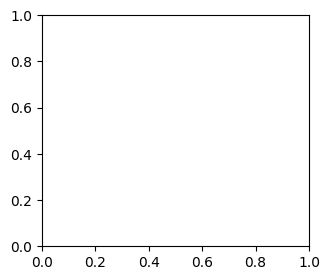

In [4]:
plt.figure(figsize=(20,3))
cnt=1
for x in range(5):
    plt.subplot(1,5,cnt)
    plt.imshow(feature_maps[0][:,:,x],cmap='gray')
    cnt+=1

In [5]:
# 모델의 두번째 레이어만 사용
plt.figure(figsize=(15,3))
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
visual_model.summary()      

test_img = np.expand_dims(test_images[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(test_images[1],cmap='gray')


plt.figure(figsize=(20,3))
cnt=1
for x in range(5):
    plt.subplot(1,5,cnt)
    plt.imshow(feature_maps[0][:,:,x],cmap='gray')
    cnt+=1

NameError: name 'tf' is not defined

<Figure size 1500x300 with 0 Axes>

In [6]:
# 모델의 3번째 레이어만 사용
plt.figure(figsize=(15,3))
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
visual_model.summary()      

test_img = np.expand_dims(test_images[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(test_images[1],cmap='gray')


plt.figure(figsize=(20,3))
cnt=1
for x in range(2):
    plt.subplot(1,2,cnt)
    plt.imshow(feature_maps[0][:,:,x],cmap='gray')
    cnt+=1


NameError: name 'tf' is not defined

<Figure size 1500x300 with 0 Axes>

In [7]:
# 모델의 4번째 레이어만 사용 (복원)
plt.figure(figsize=(15,3))
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[3])
visual_model.summary()      

test_img = np.expand_dims(test_images[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(test_images[1],cmap='gray')


plt.figure(figsize=(20,3))
cnt=1
for x in range(2):
    plt.subplot(1,2,cnt)
    plt.imshow(feature_maps[0].reshape(11,11,2)[:,:,x],cmap='gray')
    cnt+=1

NameError: name 'tf' is not defined

<Figure size 1500x300 with 0 Axes>

## 활성화함수를 변경하여봅니다

<Figure size 1080x216 with 0 Axes>

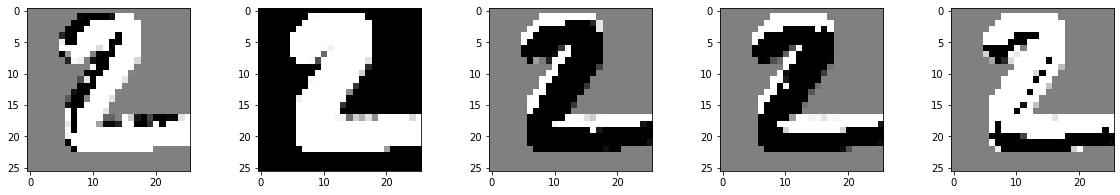

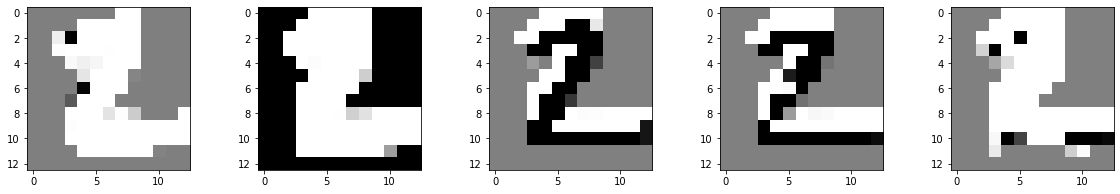

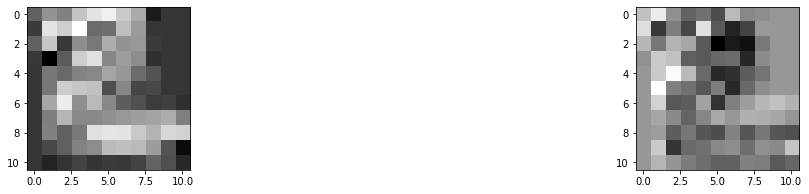

In [119]:
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='sigmoid'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))


get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output


# 모델의 0번째 레이어만 사용 
plt.figure(figsize=(15,3))

for layer in range(3):
    visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[layer])
    test_img = np.expand_dims(test_images[1], axis = 0)
    feature_maps = visual_model.predict(test_img)

    plt.figure(figsize=(20,3))
    cnt=1

    size=feature_maps.shape[-1]
    
    for x in range(size):
        plt.subplot(1,size,cnt)
        plt.imshow(feature_maps[0][:,:,x],cmap='gray')
        cnt+=1
    plt.show()
        


<Figure size 1080x216 with 0 Axes>

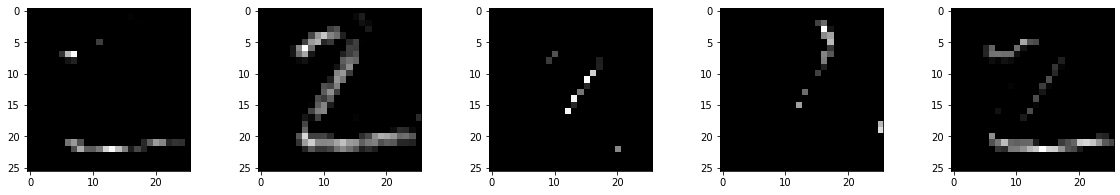

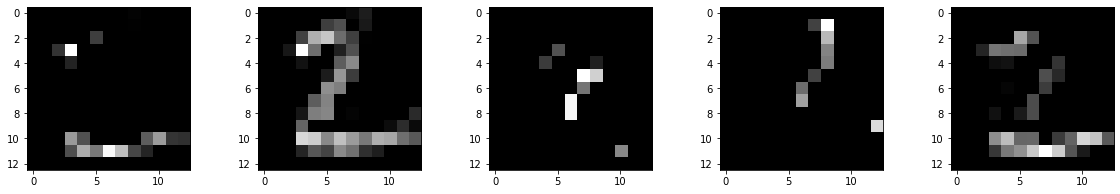

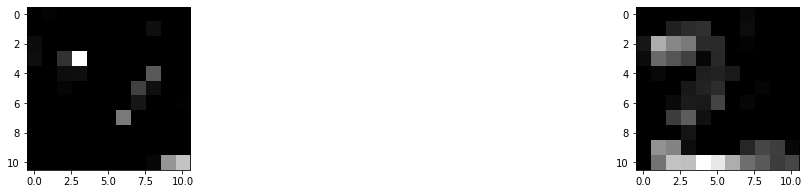

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
flatten_46 (Flatten)         (None, 242)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 486       
_________________________________________________________________
dense_90 (Dense)             (None, 10)                30        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_______________________________________________________

In [140]:
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

 
plt.figure(figsize=(15,3))

for layer in range(3):
    visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[layer])
    test_img = np.expand_dims(test_images[1], axis = 0)
    feature_maps = visual_model.predict(test_img)

    plt.figure(figsize=(20,3))
    cnt=1

    size=feature_maps.shape[-1]
    
    for x in range(size):
        plt.subplot(1,size,cnt)
        plt.imshow(feature_maps[0][:,:,x],cmap='gray')
        cnt+=1
    plt.show()
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 26, 26, 5)         0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 11, 11, 2)         0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 242)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 2)               

<Figure size 1080x216 with 0 Axes>

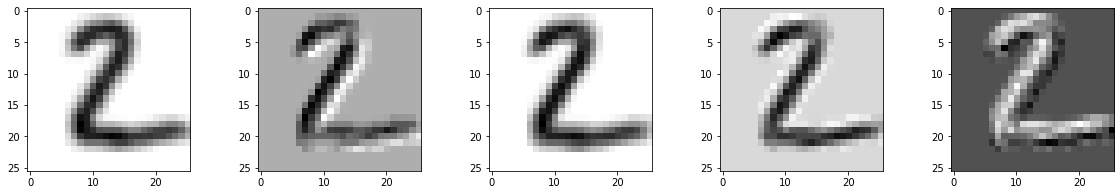

5


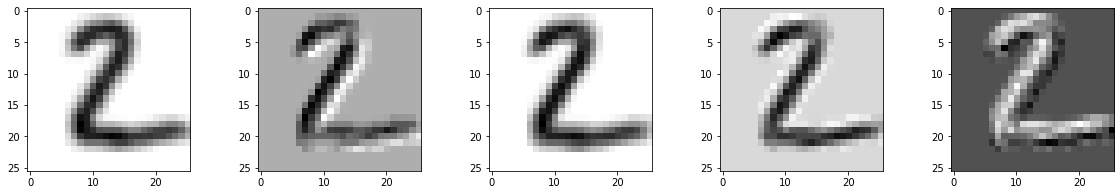

5


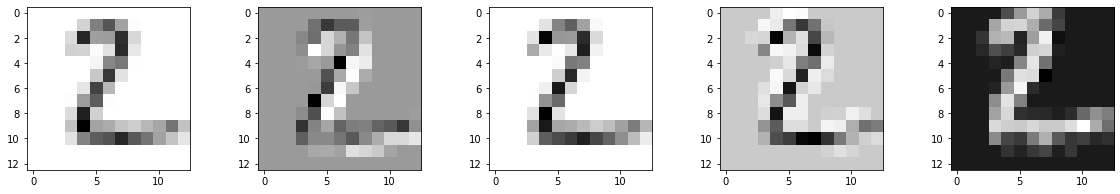

2


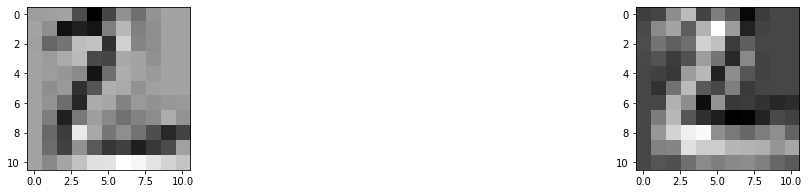

In [141]:
# https://balmostory.tistory.com/52  
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), input_shape=(28, 28, 1)))
model.add(layers.LeakyReLU(1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3)))
model.add(layers.LeakyReLU())

model.add(layers.Flatten())
model.add(layers.Dense(2,activation='relu'))
#model.add(layers.LeakyReLU())
model.add(layers.Dense(10, activation='softmax'))

model.summary()
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output


plt.figure(figsize=(15,3))

for layer in range(4):
    visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[layer])
    test_img = np.expand_dims(test_images[1], axis = 0)
    feature_maps = visual_model.predict(test_img)

    plt.figure(figsize=(20,3))
    cnt=1

    size=feature_maps.shape[-1]
    print(size)
    for x in range(size):
        plt.subplot(1,size,cnt)
        plt.imshow(feature_maps[0][:,:,x],cmap='gray')
        cnt+=1
    plt.show()